In [1]:
 #import libraries 

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [3]:
#loading data

In [4]:
loan=pd.read_csv('Loan_Data.csv')

In [5]:
len(loan)

614

In [6]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#### Explaining Dataset

Loan_ID	Unique:           Loan ID <br>
Gender:	                Male/Female <br>
Married	Applicant:       married (Y/N)<br>
Dependents:	            Number of dependents <br>
Education:	    Applicant Education (Graduate/ Under Graduate)<br>
Self_Employed:	        Self employed (Y/N)<br>
ApplicantIncome	:        Applicant income<br>
CoapplicantIncome:	    Coapplicant income<br>
LoanAmount:	            Loan amount in thousands<br>
LoanAmountTerm:	        Term of loan in months<br>
Credit_History:	        credit history meets guidelines<br>
Property_Area:	        Urban/ Semi Urban/ Rural<br>
Loan_Status	(Target):    Loan approved (Y/N)<br>

In [7]:
loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
loan.shape

(614, 13)

In [10]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


#### Data Cleaning

In [11]:
#find missing values 

In [12]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
#fill missing values
loan['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [14]:
loan['Gender'].fillna('Male', inplace=True)

In [15]:
loan['Married'].mode()

0    Yes
Name: Married, dtype: object

In [16]:
loan['Married'].fillna('Yes', inplace=True)

In [17]:
loan['Dependents'].mode()

0    0
Name: Dependents, dtype: object

In [18]:
loan['Dependents'].fillna(0, inplace=True)

In [19]:
loan['Self_Employed'].mode()

0    No
Name: Self_Employed, dtype: object

In [20]:
loan['Self_Employed'].fillna('No', inplace=True)

In [21]:
loan['LoanAmount'].fillna(loan['LoanAmount'].mean(), inplace=True)

In [22]:
loan['Loan_Amount_Term'].fillna(loan['Loan_Amount_Term'].mean(), inplace=True)

In [23]:
loan['Credit_History'].mode()

0    1.0
Name: Credit_History, dtype: float64

In [24]:
loan['Credit_History'].fillna(1.0, inplace=True)

In [25]:
loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [26]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

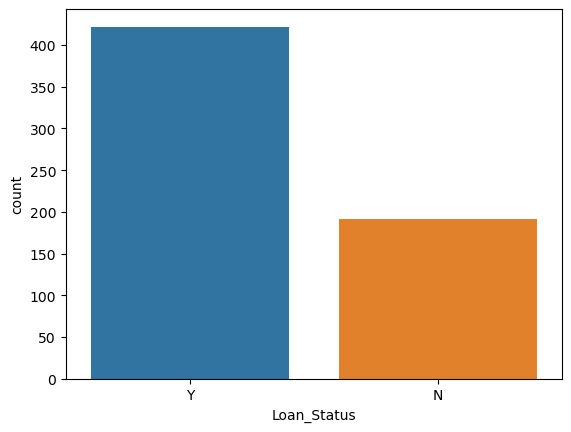

In [27]:
sns.countplot(x='Loan_Status', data=loan)

#### Preparing Data for model

In [28]:
#check for non numeric data

In [29]:
loan.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [30]:
#drop columns not needed

In [31]:
loan.drop(['Loan_ID','Gender','Property_Area'], axis=1,inplace=True)

In [32]:
loan.head(7)

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Y
1,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,N
2,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Y
3,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Y
4,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Y
5,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Y
6,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,Y


In [33]:
#covert non numerival columns to numerical columns 

In [36]:
married=pd.get_dummies(loan['Married'], drop_first=True)

In [37]:
loan['Married']=married

In [38]:
loan

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,0,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Y
1,1,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,N
2,1,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Y
3,1,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Y
4,0,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Y
...,...,...,...,...,...,...,...,...,...,...
609,0,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Y
610,1,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Y
611,1,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Y
612,1,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Y


In [44]:
loan.drop('Dependents', axis=1, inplace=True)

In [51]:
pd.get_dummies(loan['Education'], drop_first=True)

,Not Graduate
0,0
1,0
2,0
3,1
4,0
...,...
609,0
610,0
611,0
612,0


In [52]:
notgrad=pd.get_dummies(loan['Education'], drop_first=True)

In [53]:
loan['Not_Graduate']=notgrad

In [66]:
loan.drop('Education', axis=1, inplace=True)

In [59]:
Employed=pd.get_dummies(loan['Self_Employed'], drop_first=True)

In [60]:
loan['Self_Employed']=Employed

In [63]:
status=pd.get_dummies(loan['Loan_Status'], drop_first=True)

In [64]:
loan['Loan_Status']=status

In [67]:
loan

,Married,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Not_Graduate
0,0,0,5849,0.0,146.412162,360.0,1.0,1,0
1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,3000,0.0,66.000000,360.0,1.0,1,0
3,1,0,2583,2358.0,120.000000,360.0,1.0,1,1
4,0,0,6000,0.0,141.000000,360.0,1.0,1,0
...,...,...,...,...,...,...,...,...,...
609,0,0,2900,0.0,71.000000,360.0,1.0,1,0
610,1,0,4106,0.0,40.000000,180.0,1.0,1,0
611,1,0,8072,240.0,253.000000,360.0,1.0,1,0
612,1,0,7583,0.0,187.000000,360.0,1.0,1,0


In [68]:
loan.columns

Index(['Married', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Loan_Status',
       'Not_Graduate'],
      dtype='object')

In [69]:
#Separate dependent and independent variable 

In [70]:
x=loan[['Married', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Not_Graduate']]
y=loan['Loan_Status']

In [71]:
x

,Married,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Not_Graduate
0,0,0,5849,0.0,146.412162,360.0,1.0,0
1,1,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,3000,0.0,66.000000,360.0,1.0,0
3,1,0,2583,2358.0,120.000000,360.0,1.0,1
4,0,0,6000,0.0,141.000000,360.0,1.0,0
...,...,...,...,...,...,...,...,...
609,0,0,2900,0.0,71.000000,360.0,1.0,0
610,1,0,4106,0.0,40.000000,180.0,1.0,0
611,1,0,8072,240.0,253.000000,360.0,1.0,0
612,1,0,7583,0.0,187.000000,360.0,1.0,0


In [72]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: uint8

#### Data Modelling

Building model using logisic regression 

In [74]:
#import train test split 

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
#train test split 

In [77]:

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=12)

In [78]:
#import logistic regression 

In [79]:
from sklearn.linear_model import LogisticRegression

In [80]:
#fit logistic regression 

In [81]:
lr=LogisticRegression()

In [82]:
lr.fit(x_train, y_train)

LogisticRegression()

In [83]:
#predict

In [84]:
predict=lr.predict(x_test)

### Testing

In [85]:
#print confusion matrix

In [86]:
from sklearn.metrics import confusion_matrix

In [87]:
pd.DataFrame(confusion_matrix(y_test,predict),columns=['Predicted (Status = No)','Predicted (Status = Yes)'],index=['Actual (Status = No)','Actual (Status = Yes)'])


,Predicted (Status = No),Predicted (Status = Yes)
Actual (Status = No),30,28
Actual (Status = Yes),7,120


In [88]:
#import classification report

In [89]:
from sklearn.metrics import classification_report

In [91]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.81      0.52      0.63        58
           1       0.81      0.94      0.87       127

    accuracy                           0.81       185
   macro avg       0.81      0.73      0.75       185
weighted avg       0.81      0.81      0.80       185



In [92]:
sns.regplot(x=x, y=y, data=loan, logistic=True, ci=None)

ValueError: regplot inputs must be 1d